In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Plot cumulative topic sentiment over time

In [5]:
data_directory = "data"
tickers = ["BRENT", "OIL"]
topics = [["price", "supply"], ["russia"]]

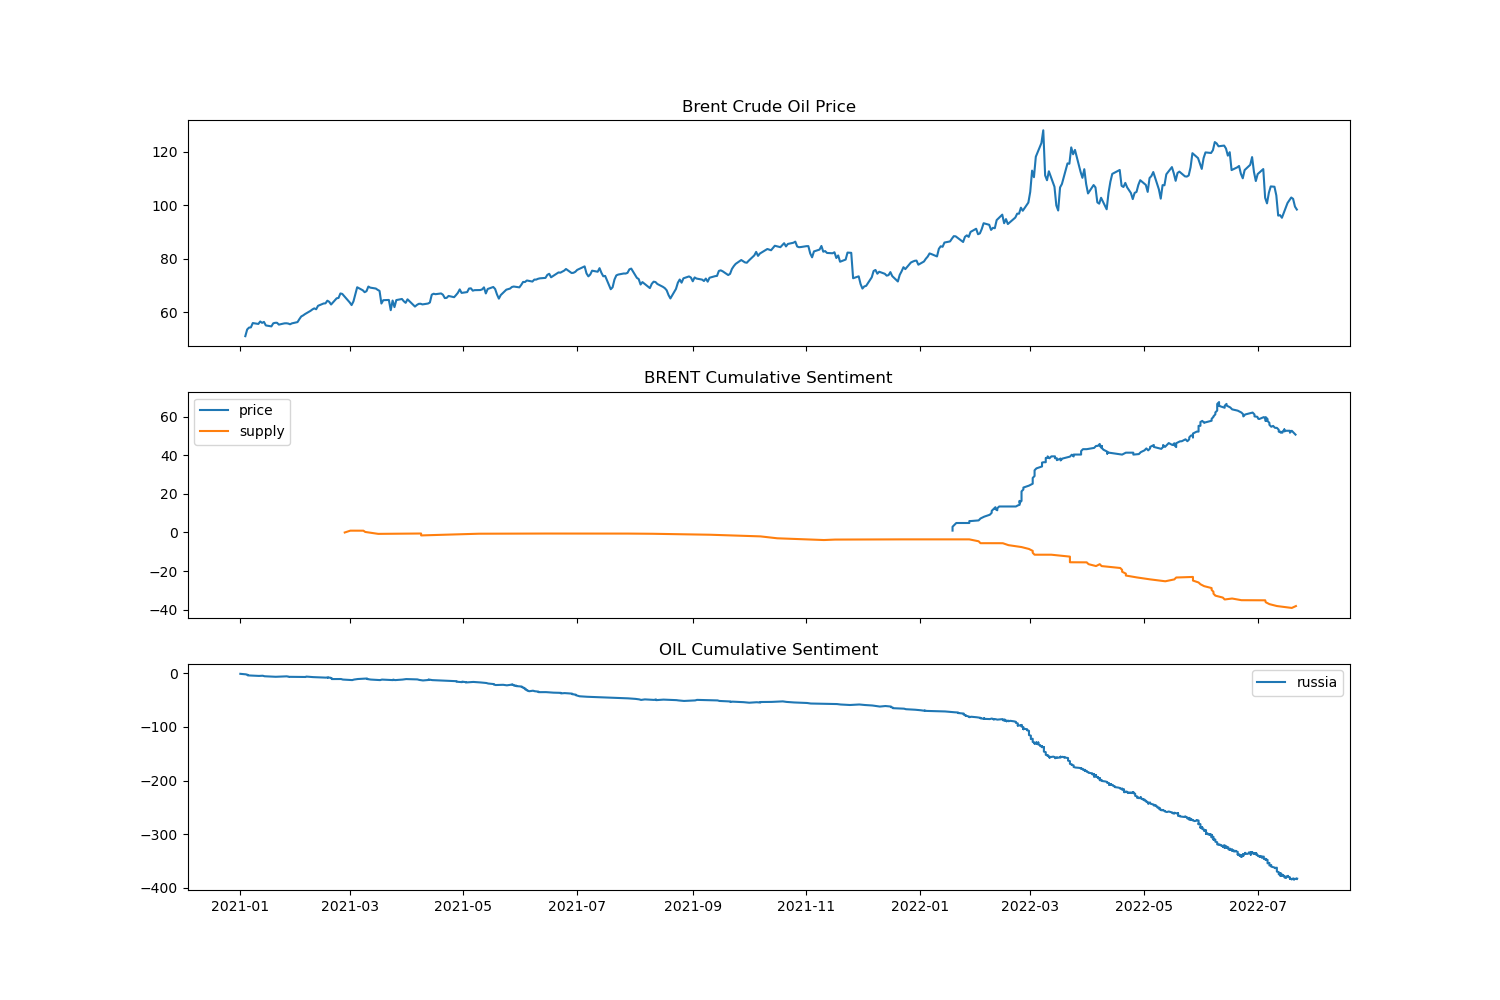

In [6]:
%matplotlib widget
fig, ax = plt.subplots(1+len(tickers), figsize = (15,10),sharex=True)
ax[0].set_title("Brent Crude Oil Price")
prices_df = pd.read_csv("Brent Oil Futures Historical Data.csv") #Load hisotrical Price data
prices_df["Date"] = pd.to_datetime(prices_df["Date"])
prices_df.set_index("Date", inplace=True)
ax[0].plot(prices_df["Price"])

for i in range(len(tickers)):
    ticker_topics = topics[i]
    for x in range(len(ticker_topics)):
        sentiment_df = pd.read_csv(f"{data_directory}/{tickers[i]}_{ticker_topics[x]}_sentiment_all_headlines.csv", encoding = "ISO-8859-1") #Load saved sentiment results for each ticker and topic
        sentiment_df["sentiment"] = 1*sentiment_df["positive"] + -1*sentiment_df["negative"]
        sentiment_df["timestamp"] = pd.to_datetime(sentiment_df["timestamp"])
        sentiment_df.set_index("timestamp", inplace=True)
        sentiment_df.sort_index(inplace=True)
        ax[1+i].plot(sentiment_df["sentiment"].cumsum(), label=f"{ticker_topics[x]}")
        ax[1+i].set_title(f"{tickers[i]} Cumulative Sentiment")
    ax[1+i].legend()